# Density approximation of $I\_dIE$: SVCJ - Heston part

When there are no jumps, the SVCJ degenerates into the Heston model.

## Through IdIE

| $t$ |  $v_0$   | $k$  | $\theta$ | $\sigma$ | $\rho$ |  $r$   |     | S    | K   | true price |
|:---:|:--------:|:----:|:--------:|:--------:|:------:|:------:|:---:|:----:|:---:|:----------:|
| 1.0 | 0.007569 | 3.46 |  0.008   |   0.14   | -0.82  | 0.0789 |     | 100  | 100 |   6.8619   |

|    lb1     |    ub1     |    lb2    |    ub2     |
|:----------:|:----------:|:---------:|:----------:|
|-0.2111598  | 0.7190324  |-0.1380519 | 0.1603645  |

- $\zeta_1 = I_t$: lb1, ub1
- $\zeta_2 = dI\!E_t + c I_t$: lb2, ub2, $c = -0.2825008$

In [1]:
from pearsondist import Pearson8, Support8

from utils import plot_pdf_cdf, plot_dpdf_pdf
from joint_mom import comp_joint_moms_mat
from joint_mom_tr import joint_mom_tr
import numpy as np

In [2]:
jmom_tr = joint_mom_tr
degree = 4
par = {'h': 1, 'v0': 0.007569, 'k': 3.46, 'theta': 0.008, 'sigma': 0.14, 'rho': -0.82, 'mu': 0.0789}
jmom = comp_joint_moms_mat(par)

mu_d1 = [jmom_tr(i, 0, jmom) for i in range(1, 2 * degree + 1)]
mu_d2 = [jmom_tr(0, i, jmom) for i in range(1, 2 * degree + 1)]
mu_d1d2 = [[jmom_tr(i, j, jmom) for j in range(degree + 1)] for i in range(degree + 1)]

## Pearson Density Approximation ($\zeta_1 = x_1$): $I_t$

{'A1': np.float64(14.368362861744863),
 'A2': np.float64(-8.20334698316027),
 'A3': np.float64(-6.165015878584595),
 'B3': np.float64(16.218794279363504),
 'type': 44,
 'x1': np.float64(-0.42797803503811216),
 'x2': np.float64(-0.21736738113918982),
 'x3': np.complex128(0.9612781912336426+0.8580715038397481j)}
a = 0.04144752029413257, scale = 11.46441326774913
iteration: 0, x0 =   -0.1889126	iteration: 10, x0 =   -0.2111598
iteration: 0, x0 =    0.1074856	iteration: 10, x0 =    0.7190324


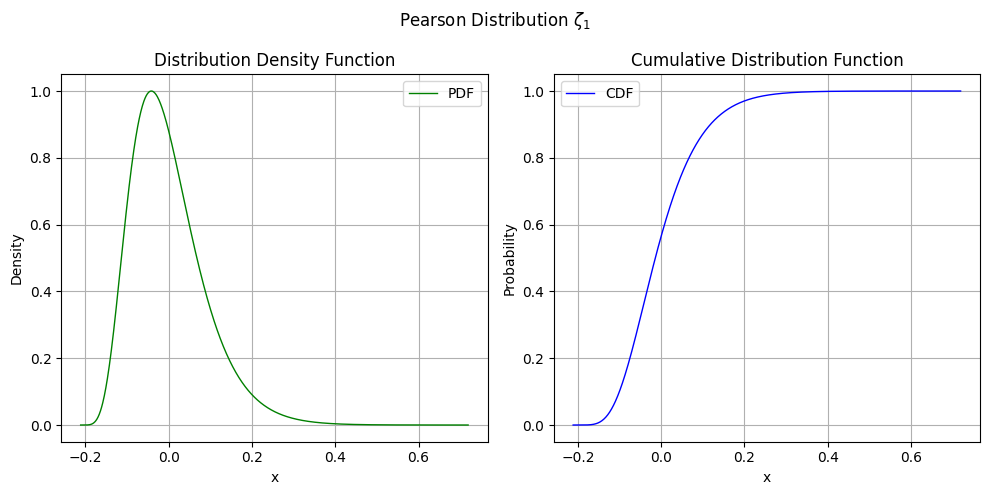

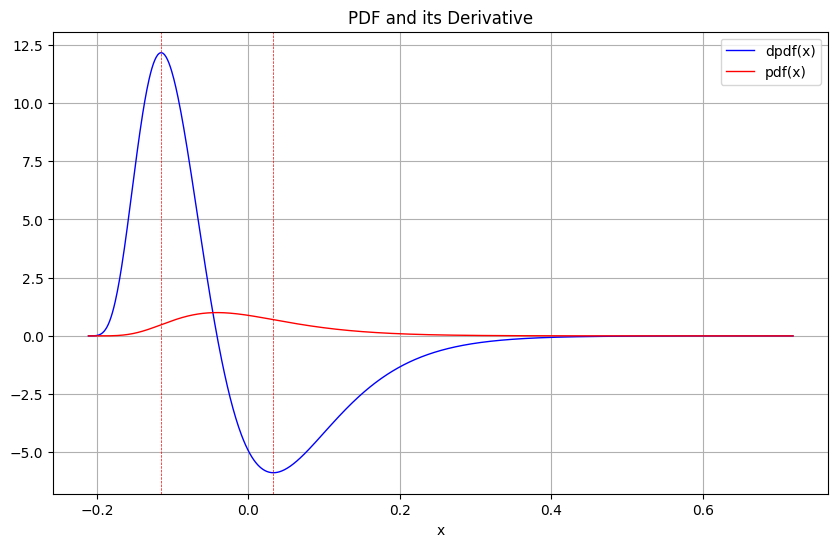

pdf(-0.2111598) = 2.22e-08, pdf(0.7190324) = 1.14e-05


In [3]:
from pprint import pprint

pearson = Pearson8(mu_d1)
pprint(pearson.pfd) # print(pearson.mom)
print(f'a = {pearson.coef[0]}, scale = {pearson.scale}') # print("coef: ", pearson.coef)
pearson.determine_bounds()

lbub = pearson.bounds
# lbub1 = (-0.2173673, 1.0)
x = np.linspace(lbub[0], lbub[1], 1000)

pdf = pearson.pdf(x); title = r'Pearson Distribution $\zeta_1$'
plot_pdf_cdf(x, pdf, title)
dpdf = pearson.dpdf(x); title = 'PDF and its Derivative'
support8 = Support8(pearson.coef); roots = support8.ddpdf_roots()
plot_dpdf_pdf(x, dpdf, pdf, title, roots)

print(f'pdf({lbub[0]:.7f}) = {pearson.pdf(lbub[0]):.2e}, pdf({lbub[1]:.7f}) = {pearson.pdf(lbub[1]):.2e}')

## Pearson Density Approximation ($x_2$): $dI\!E_t$

{'A1': np.float64(-1.8244948345273013),
 'A2': np.float64(-109.63336719221265),
 'A3': np.float64(111.45786202673995),
 'B3': np.float64(1347.220415887337),
 'type': 44,
 'x1': np.float64(-0.05704611502883549),
 'x2': np.float64(7.111556494674964),
 'x3': np.complex128(-2.546525661888633+5.7480981143345495j)}
a = 0.02017941658033078, scale = -72.01577201966239
iteration: 0, x0 =   -0.0747612	iteration: 10, x0 =   -0.0570623
iteration: 0, x0 =    0.0344019	iteration: 10, x0 =    0.2897143


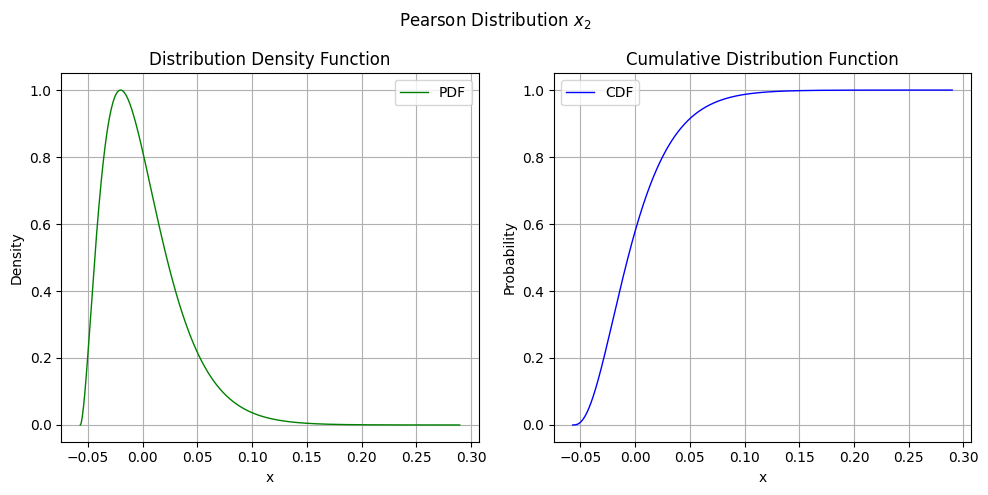

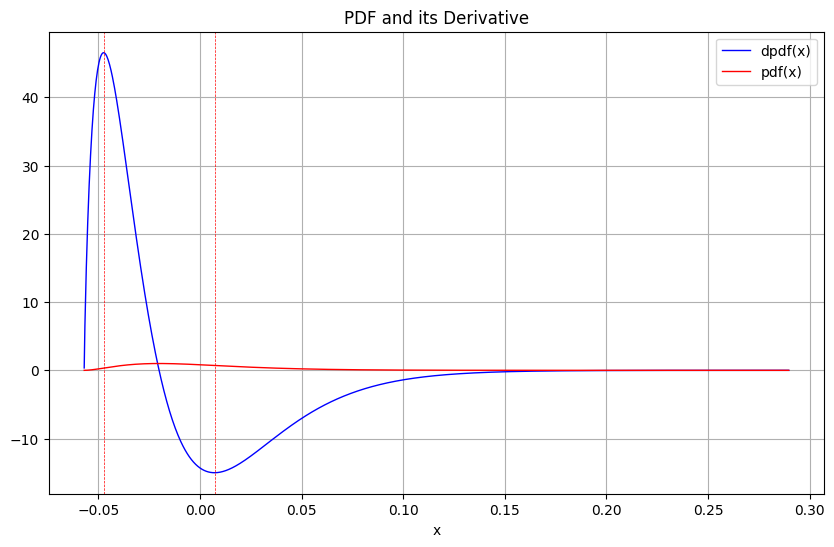

pdf(-0.0570361) = 1.93e-06, pdf(0.2897143) = 1.27e-05


In [4]:
from pearsondist.pearson8 import Pearson8

mu_x2 = jmom[0][1:9]
pearson = Pearson8(mu_x2)

pprint(pearson.pfd) # print(pearson.mom)
print(f'a = {pearson.coef[0]}, scale = {pearson.scale}') # print("coef: ", pearson.coef)
pearson.determine_bounds()

lbub = pearson.bounds
# lbub_x2 = (-0.0570461, 0.3)
x = np.linspace(lbub[0], lbub[1], 1000)

# txt = ','.join(f'{mu_:.9f}' for mu_ in mu_x2); print(f'mu_x2 = [{txt}]')

pdf = pearson.pdf(x); title = r'Pearson Distribution $x_2$'
plot_pdf_cdf(x, pdf, title)

dpdf = pearson.dpdf(x); title = 'PDF and its Derivative'
support8 = Support8(pearson.coef); roots = support8.ddpdf_roots()
plot_dpdf_pdf(x, dpdf, pdf, title, roots)

print(f'pdf({lbub[0]:.7f}) = {pearson.pdf(lbub[0]):.2e}, pdf({lbub[1]:.7f}) = {pearson.pdf(lbub[1]):.2e}')

## Pearson Density Approximation ($\zeta_2$): $dI\!E_t + c I_t$

The transformed variable $\zeta_2 = dI\!E_t + c I_t$,

$c = -\frac{\mathrm{cov}(I_t, dI\!E_t)}{\mathrm{var}(I_t)} = -0.2825008$

$\mathrm{cov}(\zeta_1, \zeta_2) = \mathrm{cov}(I_t, dI\!E_t + c I_t) = \mathrm{cov}(I_t, dI\!E_t) + c \times\mathrm{var}(I_t) = 0$

In [5]:
def compute_c(muMatrix):
    mu = muMatrix
    m1 = mu[1][0]
    m2 = mu[0][1]
    cov = mu[1][1] - m1 * m2
    var = mu[2][0] - m1 ** 2
    c = - cov / var
    return c

c = compute_c(jmom)
print(f"c = {compute_c(jmom):.7f}")
print(rf"The transformed variable $\zeta_2 = c I_t + dI\!E_t$, $c = {c:.7f}$")

c = -0.2825008
The transformed variable $\zeta_2 = c I_t + dI\!E_t$, $c = -0.2825008$


{'A1': np.float64(-4.24169863683566),
 'A2': np.float64(-3.5130185695129628),
 'A3': np.float64(7.754717206348623),
 'B3': np.float64(0.03242675294369477),
 'type': 44,
 'x1': np.float64(-0.19119599716953062),
 'x2': np.float64(0.1937401687941338),
 'x3': np.complex128(-0.010497464868123814+0.0542576387614144j)}
a = 0.002412423996630933, scale = 9.851922946579244
iteration: 0, x0 =   -0.0385485	iteration: 10, x0 =   -0.1380519
iteration: 0, x0 =    0.0337575	iteration: 10, x0 =    0.1603645


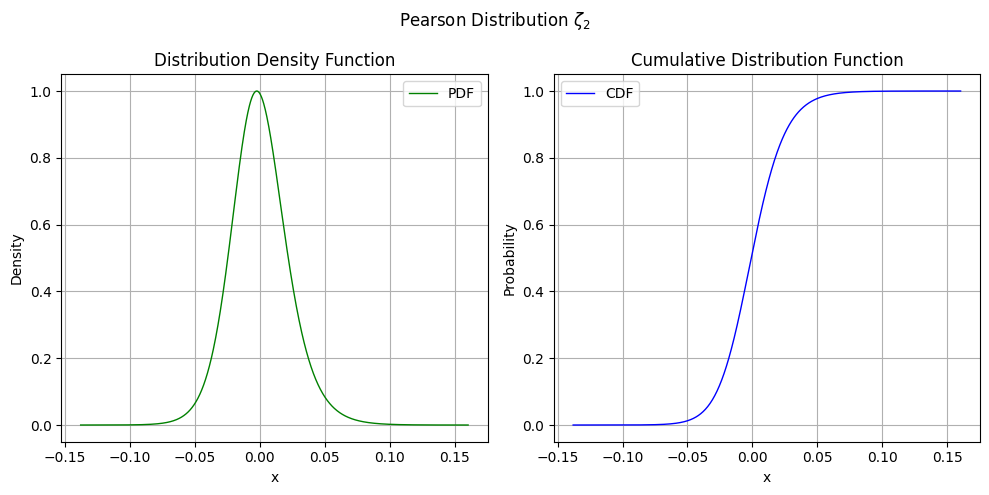

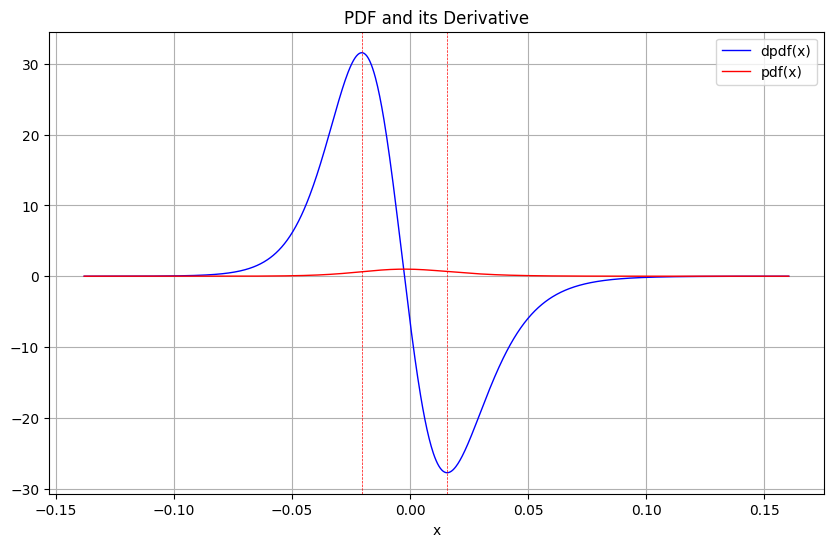

pdf(-0.1380519) = 6.74e-06, pdf(0.1603645) = 7.81e-06


In [6]:
pearson = Pearson8(mu_d2)
pprint(pearson.pfd)
print(f'a = {pearson.coef[0]}, scale = {pearson.scale}') # print("coef: ", pearson.coef)
pearson.determine_bounds()

lbub = pearson.bounds
# lbub2 = (-0.1911959, 0.1937401)
x = np.linspace(lbub[0], lbub[1], 1000)

pdf = pearson.pdf(x); title = r'Pearson Distribution $\zeta_2$'
plot_pdf_cdf(x, pdf, title)

dpdf = pearson.dpdf(x); title = 'PDF and its Derivative'
support8 = Support8(pearson.coef); roots = support8.ddpdf_roots()
plot_dpdf_pdf(x, dpdf, pdf, title, roots)

print(f'pdf({lbub[0]:.7f}) = {pearson.pdf(lbub[0]):.2e}, pdf({lbub[1]:.7f}) = {pearson.pdf(lbub[1]):.2e}')